# Abalone Age Prediction

## Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

## Converting data from .data file to machine learning model readable format

In [11]:
d = np.genfromtxt('abalone.data',
                     skip_header=1,
                     skip_footer=1,
                     names=True,
                     dtype=None,
                     delimiter = ',')

c:\users\rishi sharma\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  


## Converting data into pandas dataframe

In [25]:
df = pd.DataFrame(d)
# df = pd.read_csv('Abalone_data.csv')

## Taking a look a the data

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,70,53,18,45.1,19.9,9.7,14.0,7
1,F,106,84,27,135.4,51.3,28.3,42.0,9
2,M,88,73,25,103.2,43.1,22.8,31.0,10
3,I,66,51,16,41.0,17.9,7.9,11.0,7
4,I,85,60,19,70.3,28.2,15.5,24.0,8


## Handling the Categorical data

In [4]:
le = OneHotEncoder()
labels = pd.DataFrame(le.fit_transform(np.array(df['Sex']).reshape(-1, 1)).toarray())
labels.columns = ['Label_0', 'Label_1', 'Label_2']
# df_final = pd.concat([df, labels], axis = 1)

In [5]:
# df_final.head()

In [26]:
df_final = df.drop(columns = ['Sex'])

In [27]:
df_final.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,70,53,18,45.1,19.9,9.7,14.0,7
1,106,84,27,135.4,51.3,28.3,42.0,9
2,88,73,25,103.2,43.1,22.8,31.0,10
3,66,51,16,41.0,17.9,7.9,11.0,7
4,85,60,19,70.3,28.2,15.5,24.0,8


## Seeing the statistics of the dataset

In [28]:
df_final.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000
mean,104.801724,81.578305,27.905412,165.763506,71.879957,36.122534,47.770426,9.932471
std,24.020509,19.849906,8.365278,98.084710,44.395943,21.924091,27.842510,3.223601
min,15.000000,11.000000,0.000000,0.400000,0.200000,0.100000,0.300000,1.000000
25%,90.000000,70.000000,23.000000,88.300000,37.200000,18.675000,26.000000,8.000000
50%,109.000000,85.000000,28.000000,159.950000,67.200000,34.200000,46.800000,9.000000
75%,123.000000,96.000000,33.000000,230.650000,100.400000,50.600000,65.800000,11.000000
max,163.000000,130.000000,226.000000,565.100000,297.600000,152.000000,201.000000,29.000000


## Seeing whether everthing is in int/float format or someting is in string format then convert it to int/float 

In [29]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 8 columns):
Length            4176 non-null int64
Diameter          4176 non-null int64
Height            4176 non-null int64
Whole_weight      4176 non-null float64
Shucked_weight    4176 non-null float64
Viscera_weight    4176 non-null float64
Shell_weight      4176 non-null float64
Rings             4176 non-null int64
dtypes: float64(4), int64(4)
memory usage: 261.1 KB


## Checking null values are there or not

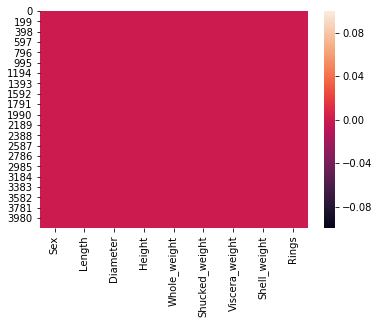

In [30]:
sns.heatmap(df.isnull())

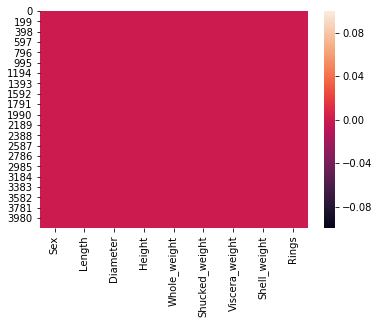

In [31]:
sns.heatmap(df.isna())

## Splitting data into trainable feature and output feature

In [32]:
df_X = df_final[['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']]
df_y = df_final['Rings']

In [33]:
df_X.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,70,53,18,45.1,19.9,9.7,14.0
1,106,84,27,135.4,51.3,28.3,42.0
2,88,73,25,103.2,43.1,22.8,31.0
3,66,51,16,41.0,17.9,7.9,11.0
4,85,60,19,70.3,28.2,15.5,24.0


In [34]:
df_y.head()

0     7
1     9
2    10
3     7
4     8
Name: Rings, dtype: int64

## Doing feature scaling of data so that everyting should be between [-1, 1]

In [35]:
sc = StandardScaler()
transformed_X = sc.fit_transform(df_X)
transformed_X

array([[-1.44900723, -1.43989229, -1.18425209, ..., -1.17096695,
        -1.20532696, -1.21305408],
       [ 0.0498915 ,  0.12201495, -0.10824748, ..., -0.46361041,
        -0.35684354, -0.20727719],
       [-0.69955786, -0.4322102 , -0.34735962, ..., -0.64833409,
        -0.60773918, -0.60240383],
       ...,
       [ 0.63279657,  0.67624011,  1.56553747, ...,  0.74835715,
         0.97518418,  0.49676663],
       [ 0.84097695,  0.77700832,  0.25042072, ...,  0.77313716,
         0.73341202,  0.41055718],
       [ 1.54879024,  1.48238578,  1.32642533, ...,  2.64064851,
         1.78717368,  1.84019719]])

In [16]:
new_X = pd.concat([pd.DataFrame(transformed_X), labels], axis = 1)
new_X.head()

,0,1,2,3,4,5,6,Label_0,Label_1,Label_2
0,-1.449007,-1.439892,-1.184252,-1.230344,-1.170967,-1.205327,-1.213054,0.0,0.0,1.0
1,0.049892,0.122015,-0.108247,-0.309601,-0.463610,-0.356844,-0.207277,1.0,0.0,0.0
2,-0.699558,-0.432210,-0.347360,-0.637928,-0.648334,-0.607739,-0.602404,0.0,0.0,1.0
3,-1.615552,-1.540661,-1.423364,-1.272150,-1.216022,-1.287438,-1.320816,0.0,1.0,0.0
4,-0.824466,-1.087204,-1.064696,-0.973393,-0.983991,-0.940746,-0.853848,0.0,1.0,0.0


## Spliting data into training and testing set

In [36]:
X_train, X_test, y_train, y_test = train_test_split(transformed_X, df_y, test_size = 0.2)

## Checking the shape of training and testing data

In [37]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3340, 7), (836, 7), (3340,), (836,))

## Applying Decision Tree Clasifier to the data

In [38]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Predicting on testing set

In [39]:
y_pred = model.predict(X_test)

## Calculating the accuracy

In [43]:
accuracy_score(y_test, y_pred)

0.8767607655502391


## Good luck !!!